In [9]:
# general import 
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# parameters 
roi = 'V1'
subject = 'sub-001'
cortical_mask = 'cortical'

In [14]:
# defind data directory 
project_dir = '/home/ulascombes/disks/meso_shared/gaze_exp'
pp_dir = '{}/derivatives/pp_data'.format(project_dir)
data_directory = '{}/{}/func/desu/fmriprep_dct/'.format(pp_dir,subject)



# defind roi mask directory 
mask_dir = '{}/{}/masks'.format(pp_dir, subject)

#defind output directory
df_fn = "{}/{}/desu".format(pp_dir,subject)
os.makedirs(df_fn,exist_ok=True)

In [39]:
#load bold data
data = nb.load("{}/sub-001_ses-05_task-GazeColumns_run-1_space-T1w_desc-preproc_bold_dct.nii.gz".format(data_directory)).get_fdata()

In [40]:
# load roi masks 
lh_mat = nb.load("{}/{}_{}_L.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
rh_mat = nb.load("{}/{}_{}_R.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
roi_mat = lh_mat + rh_mat

In [41]:
# select data by roi mask
roi_mat[roi_mat==0] = np.nan
derives_roi_mat = data[roi_mat==True]

In [42]:
# check if the dimension are good 
roi_n_voxels = np.count_nonzero(roi_mat == True)
shape_roi_mat = derives_roi_mat.shape

if roi_n_voxels == shape_roi_mat[0]:
    print('ok')
else:
    print('error')

ok


In [43]:
a = pd.DataFrame(derives_roi_mat)

In [47]:
c = a.T

In [30]:
c.shape

(197, 2365)

In [27]:
derives_roi_mat.shape

(2365, 197)

### concatenate runs


In [4]:
# Define parameters
n_runs= 4
tasks = ['GazeColumns','GazeLines']

n = np.arange(1,n_runs+1)
runs = ['run-{n}'.format(n=n) for n in n]

### GazeColumns

In [6]:
task = tasks[0]
df_task_GazeColumns_runs = pd.DataFrame()

#tsv name
df_name_GazeColumns ='df_task_GazeColumns_runs.tsv'

for j,run in enumerate(runs) : 
    print('{} (1/{}) is processing...'.format(task,len(tasks)))
    print('{} / {} is processing...'.format(run,n_runs))
    #load bold data
    data = nb.load("{}/sub-001_ses-05_task-{}_{}_space-T1w_desc-preproc_bold_dct.nii.gz".format(data_directory,task,run)).get_fdata()

    # load roi masks 
    lh_mat = nb.load("{}/{}_{}_L.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
    rh_mat = nb.load("{}/{}_{}_R.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
    roi_mat = lh_mat + rh_mat

    # select data by roi mask
    roi_mat[roi_mat==0] = np.nan
    derives_roi_mat = data[roi_mat==True]

    df_task_run = pd.DataFrame(derives_roi_mat)
    df_task_GazeColumns_runs = pd.concat([df_task_GazeColumns_runs, df_task_run], ignore_index=True)

df_task_GazeColumns_runs = df_task_GazeColumns_runs.T

# save dataframe
df_name_GazeColumns ='df_task_GazeColumns_runs.tsv'
print('saving {}'.format(df_fn))
df_task_GazeColumns_runs.to_csv('{}/{}'.format(df_fn,df_name_GazeColumns), sep="\t", na_rep='NaN',index=False)



GazeColumns (1/2) is processing...
run-1 / 4 is processing...
GazeColumns (1/2) is processing...
run-2 / 4 is processing...
GazeColumns (1/2) is processing...
run-3 / 4 is processing...
GazeColumns (1/2) is processing...
run-4 / 4 is processing...


### GazeLines

In [15]:
task = tasks[1]
df_task_GazeLines_runs = pd.DataFrame()

#tsv name
df_name_GazeColumns ='df_task_GazeLines_runs.tsv'

for j,run in enumerate(runs) : 
    print('{} (2/{})is processing...'.format(task,len(tasks)))
    print('{} / {} is processing...'.format(run,n_runs))
    #load bold data
    data = nb.load("{}/sub-001_ses-05_task-{}_{}_space-T1w_desc-preproc_bold_dct.nii.gz".format(data_directory,task,run)).get_fdata()

    # load roi masks 
    lh_mat = nb.load("{}/{}_{}_L.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
    rh_mat = nb.load("{}/{}_{}_R.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
    roi_mat = lh_mat + rh_mat

    # select data by roi mask
    roi_mat[roi_mat==0] = np.nan
    derives_roi_mat = data[roi_mat==True]

    df_task_run = pd.DataFrame(derives_roi_mat)
    df_task_GazeLines_runs = pd.concat([df_task_GazeLines_runs, df_task_run], ignore_index=True)

df_task_GazeLines_runs = df_task_GazeLines_runs.T

# save dataframe
df_name_GazeLines ='df_task_GazeLines_runs.tsv'
print('saving {}'.format(df_fn))
df_task_GazeLines_runs.to_csv('{}/{}'.format(df_fn,df_name_GazeLines), sep="\t", na_rep='NaN',index=False)



GazeLines (2/2)is processing...
run-1 / 4 is processing...
GazeLines (2/2)is processing...
run-2 / 4 is processing...
GazeLines (2/2)is processing...
run-3 / 4 is processing...
GazeLines (2/2)is processing...
run-4 / 4 is processing...
saving /home/ulascombes/disks/meso_shared/gaze_exp/derivatives/pp_data/sub-001/desu


### Brouillon

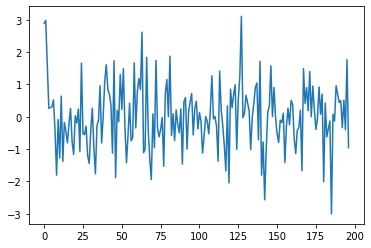

In [24]:
plt.plot(derives_roi_mat[300,:])

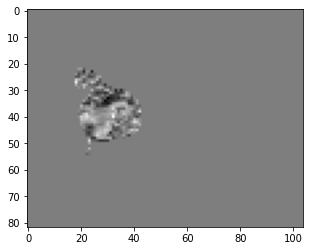

In [31]:
middle_slice = b[:,:,3,40]
plt.imshow(middle_slice)